# Tracer simulation results

* A notebook shows my NEMO run, frequently changing.

#Content
1. [**Source only, 3yrs' run**](#Source-only,-3yrs'-run)
1. [**Source + boundary, 1yr's run**](#Source-+-boundary,-1yr's-run)

In [1]:
import glob
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [2]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran

# Source only, 3yrs' run

In [3]:
filename=glob.glob('_data/EXP_l_01*.nc')
ptrc_obj = nc.Dataset(filename[0])
Ba=ptrc_obj.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]

In [4]:
from scipy.spatial import cKDTree
def do_kdtree(nav_lon, nav_lat, lons, lats):
    #
    combined_x_y_arrays = np.dstack([nav_lon.ravel(), nav_lat.ravel()])[0]
    points_list = list(np.array([lons.T, lats.T]).T)
    #
    mytree = cKDTree(combined_x_y_arrays)
    dist, index_flat = mytree.query(points_list)
    x, y = np.unravel_index(index_flat, nav_lon.shape)
    return x, y

In [5]:
lon1 = np.array([74]); lat1 = np.array([74])
lon2 = np.array([-135]); lat2 = np.array([71]) 
x_index1, y_index1 = do_kdtree(nav_lon, nav_lat, lon1, lat1)
x_index2, y_index2 = do_kdtree(nav_lon, nav_lat, lon2, lat2)

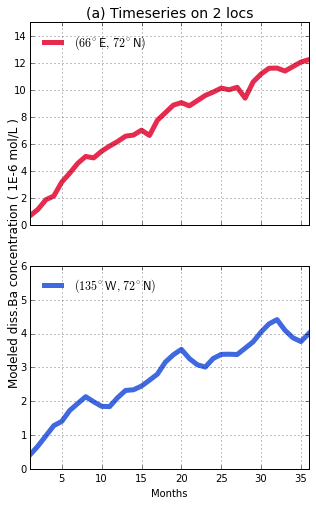

In [6]:
t = np.arange(1, 37) 
fig = plt.figure(figsize=(5, 8))
ax = fig.gca()
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
ax1.grid(); ax2.grid(); ax1.tick_params(labelbottom='off') 
ax1.set_xlim(1, 36); ax1.set_ylim(0, 15)
ax2.set_xlim(1, 36); ax2.set_ylim(0, 6)
ax1.plot(t, Ba[:, 0, x_index1, y_index1], 'k-', color=AM, linewidth=5, label = '$\mathsf{(66^\circ E,\ 72^\circ N)}$')
ax2.plot(t, Ba[:, 0, x_index2, y_index2], 'k-', color=RB, linewidth=5, label = '$\mathsf{(135^\circ W,\ 72^\circ N)}$')
LG = ax1.legend(loc=2); LG.draw_frame(False) 
LG = ax2.legend(loc=2); LG.draw_frame(False) 
ax1.set_title('(a) Timeseries on 2 locs', fontsize=14)
ax2.set_xlabel('Months')
fig.text(0.08, 0.5, 'Modeled diss.Ba concentration ( 1E-6 mol/L )', ha='center', va='center', rotation='vertical', fontsize=12)
fig.savefig('Publish/Barium_51.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
            transparent=False, bbox_inches='tight')#, pad_inches=0)

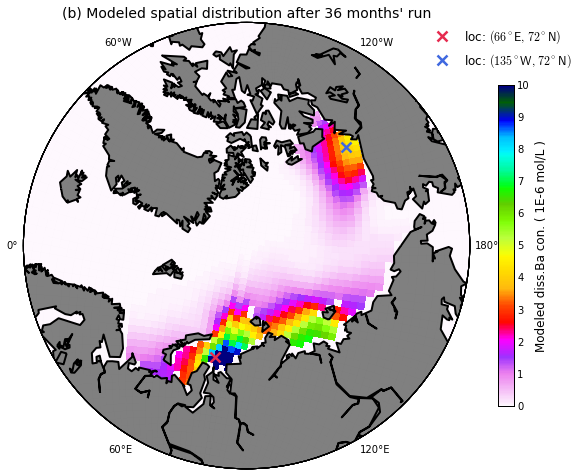

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
#
proj=Basemap(projection='npstere', resolution='c', boundinglat=60, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.pcolor(x, y, Ba[-1, 0, :, :], vmin=0, vmax=10, cmap=plt.cm.gist_ncar_r)

proj.plot(x[x_index1, y_index1], y[x_index1, y_index1], 'kx', color=AM, ms=10, mew=2.5, label='loc: $\mathsf{(66^\circ E,\ 72^\circ N)}$');
proj.plot(x[x_index2, y_index2], y[x_index2, y_index2], 'kx', color=RB, ms=10, mew=2.5, label='loc: $\mathsf{(135^\circ W,\ 72^\circ N)}$');
proj.plot(x, y, 'k-', linewidth=0.01, alpha=0.25); proj.plot(x.T, y.T, 'k-', linewidth=0.01, alpha=0.25)
CBar = plt.colorbar(CS, shrink=0.575)
CBar.set_label('Modeled diss.Ba con. ( 1E-6 mol/L )', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
LG = ax.legend(numpoints=1, bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
ax.set_title("(b) Modeled spatial distribution after 36 months' run", fontsize=14)
fig.savefig('Publish/Barium_52.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
            transparent=False, bbox_inches='tight', pad_inches=0)

# Source + boundary, 1yr's run

**What I did**

* Read in a new file;
* Boundaries are all 80 micro-mol per L, with filled value -999 for the rest.


```fortran
tra(:, :, 1, jpmyt1) = (Ba(:, :)-trb(:, :, 1, jpmyt1))*rnf(:, :)/e3t(:, :, 1)/1000.0
      DO i = 1, jpi
         DO j = 1, jpj
            IF (Ba_boundary(i, j)>0) THEN
               trn(i, j, 1, jpmyt1) = Ba_boundary(i, j)
            ENDIF
         ENDDO
      ENDDO
      WRITE(*, *) 'BC on Bering Strait:', trn(56,  123, 1, jpmyt1)

```

In [8]:
filename=glob.glob('_data/EXP_BC02*.nc')
print(filename)

['_data\\EXP_BC02_1m_00010101_00011231_grid_T.nc', '_data\\EXP_BC02_1m_00010101_00011231_grid_U.nc', '_data\\EXP_BC02_1m_00010101_00011231_grid_V.nc', '_data\\EXP_BC02_1m_00010101_00011231_ptrc_T.nc']


In [9]:
ptrc_obj = nc.Dataset(filename[-1])
Ba=ptrc_obj.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]

In [10]:
u_obj = nc.Dataset(filename[1])
U = u_obj.variables['vozoeivu'][:]
v_obj = nc.Dataset(filename[2])
V = v_obj.variables['vomecrty'][:]

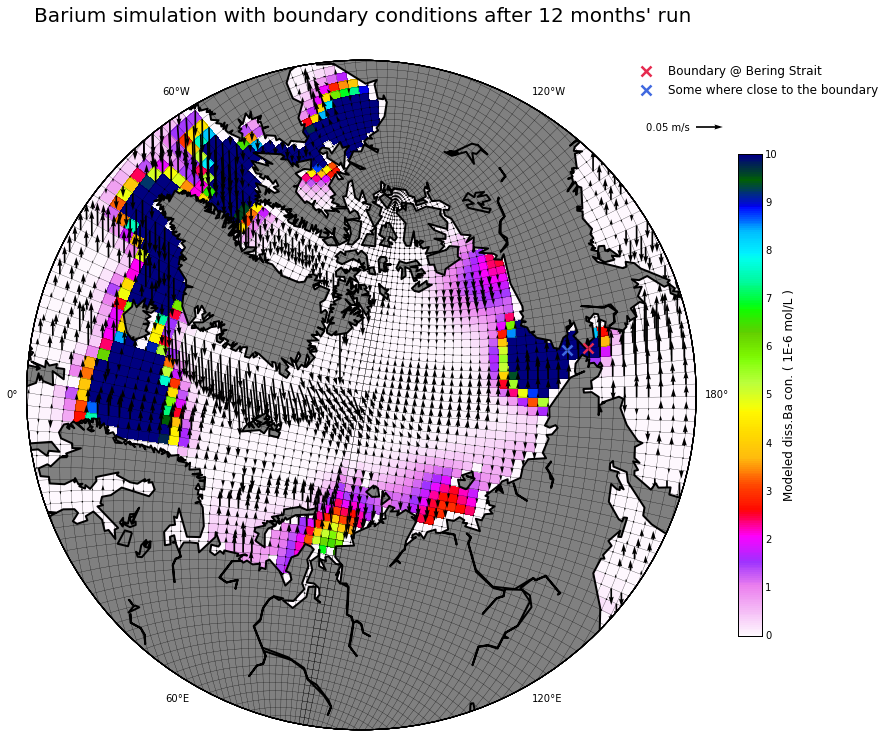

In [11]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
#
proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
x, y=proj(nav_lon, nav_lat)
# Ba
CS=proj.pcolor(x, y, Ba[-1, 0, :, :], vmin=0, vmax=10, cmap=plt.cm.gist_ncar_r)
# current
Q=proj.quiver(x[1:-2, :], y[1:-2, :], U[-1, 0, 1:-2, :], V[-1, 0, 1:-2, :], width=0.0025, scale=1.25)
Qlabel=plt.quiverkey(Q, 1, 0.9, 0.05, '0.05 m/s', labelpos='W')
# Points
proj.plot(x[122, 56], y[122, 56], 'kx', color=AM, ms=10, mew=2.5, label='Boundary @ Bering Strait')
proj.plot(x[124, 56], y[124, 56], 'kx', color=RB, ms=10, mew=2.5, label='Some where close to the boundary')
# Frame
proj.plot(x, y, 'k-', linewidth=0.25); proj.plot(x.T, y.T, 'k-', linewidth=0.25)
# Legend
LG = ax.legend(numpoints=1, bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
CBar = plt.colorbar(CS, shrink=0.575)
CBar.set_label('Modeled diss.Ba con. ( 1E-6 mol/L )', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
ax.set_title("Barium simulation with boundary conditions after 12 months' run", fontsize=20, y=1.05)

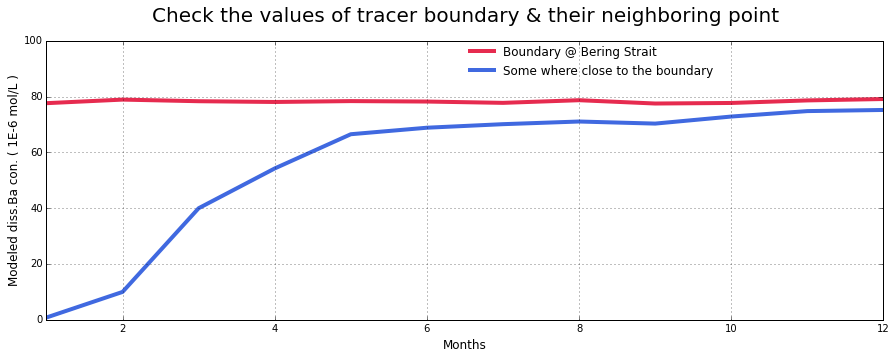

In [12]:
t = np.arange(1, 13) 
fig = plt.figure(figsize=(15, 5))
ax = fig.gca(); ax.set_ylim(0, 100); ax.set_xlim(1, 12); ax.grid()
ax.plot(t, Ba[:, 0, 122, 56], color=AM, lw=4, label='Boundary @ Bering Strait')
ax.plot(t, Ba[:, 0, 124, 56], color=RB, lw=4, label='Some where close to the boundary')
ax.set_ylabel('Modeled diss.Ba con. ( 1E-6 mol/L )', fontsize=12)
ax.set_xlabel('Months', fontsize=12)
LG = ax.legend(numpoints=1, bbox_to_anchor=(0.5, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
ax.set_title("Check the values of tracer boundary & their neighboring point", fontsize=20, y=1.05)

# Source + boundary, 5yrs' run

In [4]:
filename=glob.glob('_data/Anime*.nc')
print(filename)

['_data\\Anime_BC_1m_00010101_00051231_grid_T.nc', '_data\\Anime_BC_1m_00010101_00051231_grid_U.nc', '_data\\Anime_BC_1m_00010101_00051231_grid_V.nc', '_data\\Anime_BC_1m_00010101_00051231_ptrc_T.nc']


In [5]:
ptrc_obj = nc.Dataset(filename[-1])
Ba=ptrc_obj.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
u_obj = nc.Dataset(filename[1])
U = u_obj.variables['vozoeivu'][:]
v_obj = nc.Dataset(filename[2])
V = v_obj.variables['vomecrty'][:]

In [56]:
def movie(time_step):
    plt.cla()
    ax=plt.gca()
    #
    proj=Basemap(projection='npstere', resolution='c', boundinglat=50, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    #proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    x, y=proj(nav_lon, nav_lat)
    # Ba
    CS=proj.pcolor(x, y, Ba[time_step, 0, :, :], vmin=0, vmax=40, cmap=plt.cm.gist_ncar_r)
    # current
    #Q=proj.quiver(x[:-2, :], y[:-2, :], U[time_step, 0, :-2, :], V[time_step, 0, :-2, :], width=0.0025, scale=1.25)
    #Qlabel=plt.quiverkey(Q, 0.93, 0.91, 0.05, '0.05 m/s', labelpos='W')
    # Frame
    proj.plot(x, y, 'k-', linewidth=0.1); proj.plot(x.T, y.T, 'k-', linewidth=0.1)
    # Legend
    CBar = proj.colorbar(CS, location='right', size='2.5%', pad='5%')
    CBar.set_label('Modeled diss.Ba con. ( 1E-6 mol/L )', fontsize=12)
    CBar.ax.tick_params(axis='y', length=0)
    props = dict(boxstyle='round', facecolor='w')
    ax.text(0.85, 0.96, "after %d months"%time_step, transform=ax.transAxes, \
        fontsize=12, verticalalignment='top', bbox=props)

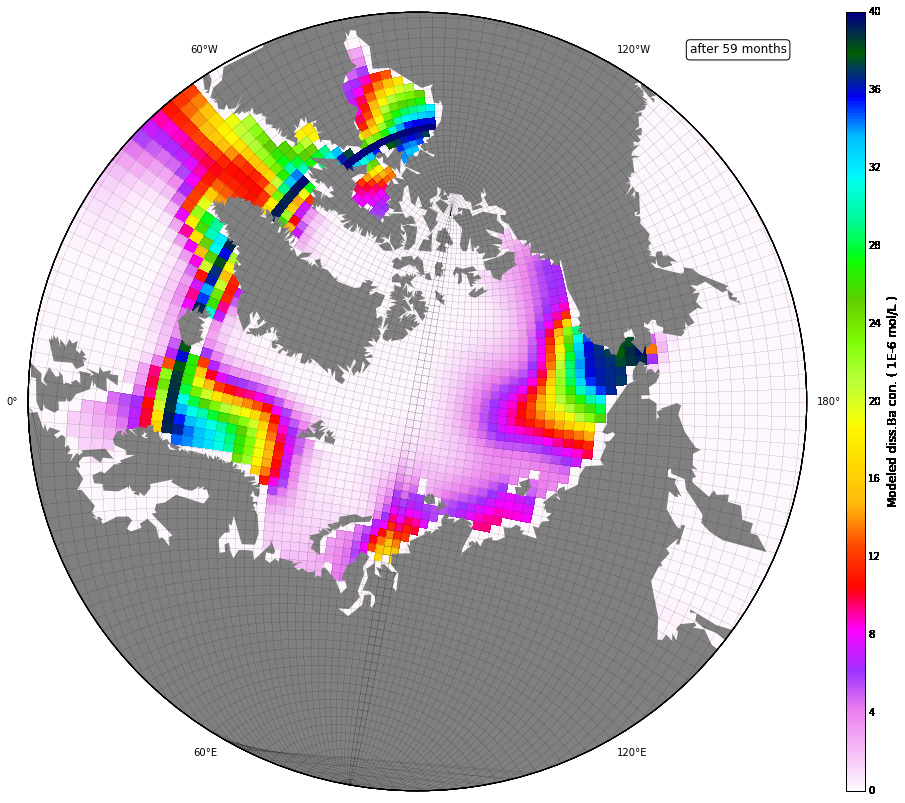

In [58]:
fig=plt.figure(figsize=(15, 15))
#movie(59)
ani_obj=animation.FuncAnimation(fig, movie, range(60), interval=500, blit=True)
ani_obj.save('Ba_5year_BC_noUV.mov', metadata={'author':'Yingkai (Kyle) Sha'})

# Another boundary

```fortran
tra(:, :, 1, jpmyt1) = (Ba(:, :)-trb(:, :, 1, jpmyt1))*rnf(:, :)/e3t(:, :, 1)/1000.0
      DO i = 1, jpi
         DO j = 1, jpj
            IF (Ba_boundary(i, j)>0) THEN
               IF (un(i, j, 1)>0) THEN ! <-------------------------------- Northward flow brings value in   
                  trn(i, j, 1, jpmyt1) = Ba_boundary(i, j)
               ENDIF
            ENDIF
         ENDDO
      ENDDO
      WRITE(*, *) 'BC on Bering Strait:', trn(56,  123, 1, jpmyt1)
```

In [10]:
filename=glob.glob('_data/Switch02_*.nc')
print(filename)

['_data\\Switch02_BC_1m_00010101_00011231_grid_T.nc', '_data\\Switch02_BC_1m_00010101_00011231_grid_U.nc', '_data\\Switch02_BC_1m_00010101_00011231_grid_V.nc', '_data\\Switch02_BC_1m_00010101_00011231_ptrc_T.nc']


In [11]:
ptrc_obj = nc.Dataset(filename[-1])
Ba=ptrc_obj.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]

In [12]:
u_obj = nc.Dataset(filename[1])
U = u_obj.variables['vozoeivu'][:]
v_obj = nc.Dataset(filename[2])
V = v_obj.variables['vomecrty'][:]

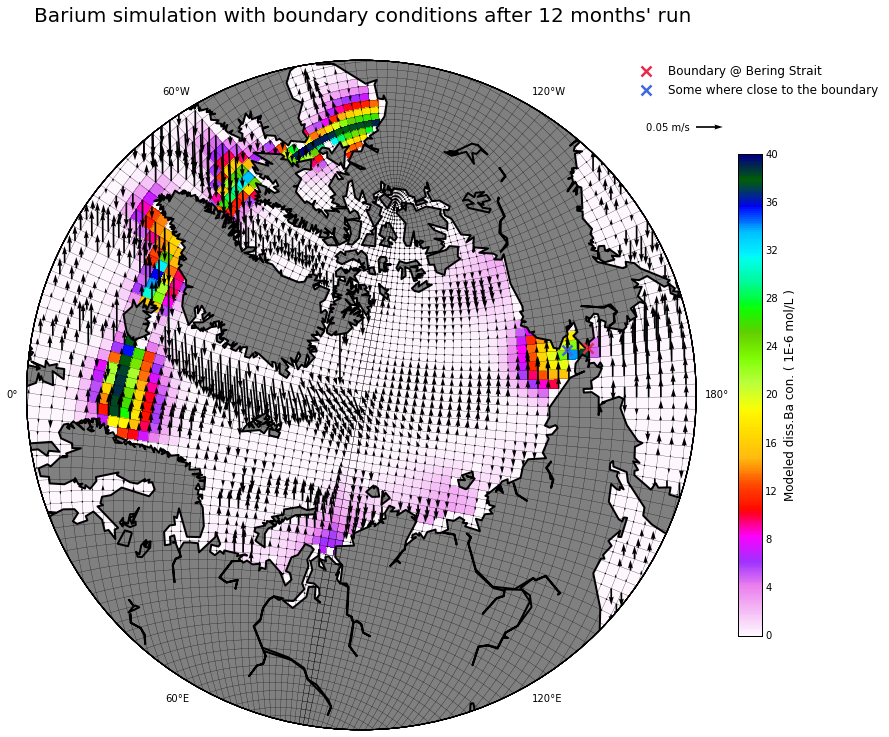

In [15]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
#
proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
x, y=proj(nav_lon, nav_lat)
# Ba
CS=proj.pcolor(x, y, Ba[-1, 0, :, :], vmin=0, vmax=40, cmap=plt.cm.gist_ncar_r)
# current
Q=proj.quiver(x[1:-2, :], y[1:-2, :], U[-1, 0, 1:-2, :], V[-1, 0, 1:-2, :], width=0.0025, scale=1.25)
Qlabel=plt.quiverkey(Q, 1, 0.9, 0.05, '0.05 m/s', labelpos='W')
# Points
proj.plot(x[122, 56], y[122, 56], 'kx', color=AM, ms=10, mew=2.5, label='Boundary @ Bering Strait')
proj.plot(x[124, 56], y[124, 56], 'kx', color=RB, ms=10, mew=2.5, label='Some where close to the boundary')
# Frame
proj.plot(x, y, 'k-', linewidth=0.25); proj.plot(x.T, y.T, 'k-', linewidth=0.25)
# Legend
LG = ax.legend(numpoints=1, bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
CBar = plt.colorbar(CS, shrink=0.575)
CBar.set_label('Modeled diss.Ba con. ( 1E-6 mol/L )', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
ax.set_title("Barium simulation with boundary conditions after 12 months' run", fontsize=20, y=1.05)

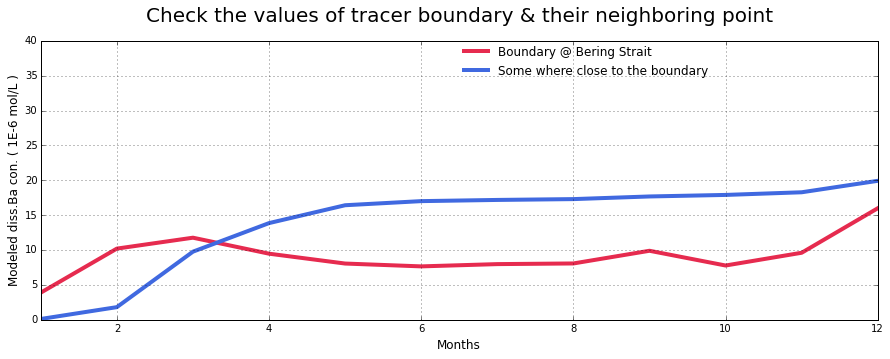

In [16]:
t = np.arange(1, 13) 
fig = plt.figure(figsize=(15, 5))
ax = fig.gca(); ax.set_ylim(0, 40); ax.set_xlim(1, 12); ax.grid()
ax.plot(t, Ba[:, 0, 122, 56], color=AM, lw=4, label='Boundary @ Bering Strait')
ax.plot(t, Ba[:, 0, 124, 56], color=RB, lw=4, label='Some where close to the boundary')
ax.set_ylabel('Modeled diss.Ba con. ( 1E-6 mol/L )', fontsize=12)
ax.set_xlabel('Months', fontsize=12)
LG = ax.legend(numpoints=1, bbox_to_anchor=(0.5, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
ax.set_title("Check the values of tracer boundary & their neighboring point", fontsize=20, y=1.05)